In [1]:
!TZ=US/Eastern date

Sun Apr 13 11:48:11 EDT 2025


In [2]:
!pwd
!echo $CONDA_PREFIX
!python -V

/ocean/projects/cis240078p/shared/analysis/D2F
/opt/packages/anaconda3-2024.10-1
Python 3.12.7


In [3]:
import os
PD = os.environ['SHARED']

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
INPUT_FILE1 = PD + '/data/Maybridge_HitDiscover.smiles.unique.v2.csv'
INPUT_FILE2 = 'maybridge.predictions.by.D2F.models.all.batch'

OUTPUT_FILE1 = 'maybridge.predictions.by.D2F.models.all.csv'
OUTPUT_FILE2 = 'maybridge.predictions.by.D2F.models.all.mean.csv'
OUTPUT_FILE3 = 'maybridge.predictions.by.D2F.models.all.mean.hist.png'

In [5]:
metadata = pd.read_csv(INPUT_FILE1, index_col=0)
metadata

,Code,SMILES
0,AC10018,FC1=CC=C(C=C1)C(C2=CC=C(F)C=C2)N3CCNCC3
1,AC12157,NC1=NC(N=CN2)=C2C(SC)=N1
2,AC13917,CN(C)CC1=CNC2=C1C=C(C=C2)OCC3=CC=CC=C3
3,AC27191,O=C(O)C1=CC=C(Br)O1
4,AC29806,O=C(O)C(N)CC1=CNC2=C1C=C(Br)C=C2
...,...,...
51770,S14814,O=[N+]([O-])C1=C(O/N=C(C)/OCC)C=CC([N+]([O-])=...
51771,S14839,O=C(N1OC2=CC=C([N+]([O-])=O)C([N+]([O-])=O)=C2...
51772,S14896,O=[N+]([O-])C1=CC=C2N=C(C3=CC=CC=C3)C(C4=CC=CC...
51773,SPB05721,CC(N1)=C(C(OCC)=O)C(/C=C/C2=CC=CC=C2)C(C(OCC)=...


In [6]:
!ls *.csv | wc

    128     128    6674


In [7]:
pred = []
for i in range(128):
    #if i == 10: continue
    pred.append(pd.read_csv(INPUT_FILE2+str(i)+'.csv'))

In [8]:
len(pred), set([x.shape for x in pred])

(128, {(248, 301), (400, 301)})

In [9]:
pred = pd.concat(pred, axis=0).reset_index(drop=True)
pred

,Ligand,CNN_AAC-R0F0,CNN_AAC-R0F1,CNN_AAC-R0F2,CNN_AAC-R0F3,CNN_AAC-R0F4,CNN_CNN-R0F0,CNN_CNN-R0F1,CNN_CNN-R0F2,CNN_CNN-R0F3,...,MPNN_CNN-R9F0,MPNN_CNN-R9F1,MPNN_CNN-R9F2,MPNN_CNN-R9F3,MPNN_CNN-R9F4,MPNN_Transformer-R9F0,MPNN_Transformer-R9F1,MPNN_Transformer-R9F2,MPNN_Transformer-R9F3,MPNN_Transformer-R9F4
0,AC10018,-12.798574,-13.268782,-13.138014,-14.372630,-11.637377,-11.910065,-15.131712,-16.839401,-16.592031,...,-11.721049,-10.630190,-15.898441,-14.194951,-11.714628,-14.665717,-11.576358,-18.530964,-15.102313,-14.933819
1,AC12157,-11.275221,-11.565394,-9.392974,-10.894536,-10.844131,-10.916800,-12.753366,-10.750846,-14.530807,...,-9.811959,-10.142866,-14.408263,-9.608483,-10.978154,-10.144109,-10.750813,-9.905245,-8.613826,-7.942410
2,AC13917,-13.801815,-14.023356,-16.819117,-12.911830,-12.123380,-10.188545,-13.148044,-13.452276,-13.090562,...,-9.759844,-12.432244,-15.792425,-11.336352,-13.648074,-11.612453,-12.371520,-12.411784,-9.926489,-13.798857
3,AC27191,-10.422757,-11.447563,-8.605762,-10.705408,-9.382017,-10.524272,-12.469094,-14.985724,-13.064110,...,-9.809798,-9.931741,-12.742807,-8.433751,-8.189372,-8.108575,-9.044732,-9.715677,-8.952364,-6.912699
4,AC29806,-12.659218,-13.904577,-12.463998,-12.234305,-10.576950,-10.943989,-14.211608,-14.220447,-13.317092,...,-8.905676,-12.059189,-14.160987,-10.308385,-11.099582,-7.688313,-8.625899,-9.020136,-7.921454,-7.623644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51043,S14814,-9.401578,-10.312070,-7.444423,-10.447967,-9.235969,-11.883564,-14.136607,-16.130823,-15.368319,...,-11.732877,-13.753481,-15.209700,-13.643689,-12.855054,-17.949738,-14.363733,-18.138912,-14.875112,-12.519711
51044,S14839,-14.024348,-15.783467,-16.194843,-16.648752,-13.991967,-12.610071,-14.390446,-13.007620,-16.061583,...,-13.377381,-13.556046,-16.958210,-11.990305,-11.730653,-10.001884,-9.816259,-10.789509,-10.810272,-9.743356
51045,S14896,-11.830504,-12.307649,-15.153249,-12.059858,-11.806534,-11.506189,-16.099247,-14.900935,-15.232805,...,-9.868829,-12.398804,-15.481224,-10.946006,-12.455783,-13.757776,-12.975321,-12.138845,-10.706029,-12.886356
51046,SPB05721,-15.001548,-15.695493,-14.693406,-15.140351,-13.701887,-12.175310,-16.086193,-16.638086,-16.093979,...,-10.830079,-13.817115,-14.481583,-13.350737,-10.912659,-17.540991,-16.612116,-15.179927,-15.522449,-14.159997


In [10]:
all([x == y for x,y in zip(pred.Ligand, metadata.Code)])

True

In [11]:
pred.to_csv(OUTPUT_FILE1, index=None)

In [12]:
pred.drop(['Ligand'], axis=1).corr().round(3)

,CNN_AAC-R0F0,CNN_AAC-R0F1,CNN_AAC-R0F2,CNN_AAC-R0F3,CNN_AAC-R0F4,CNN_CNN-R0F0,CNN_CNN-R0F1,CNN_CNN-R0F2,CNN_CNN-R0F3,CNN_CNN-R0F4,...,MPNN_CNN-R9F0,MPNN_CNN-R9F1,MPNN_CNN-R9F2,MPNN_CNN-R9F3,MPNN_CNN-R9F4,MPNN_Transformer-R9F0,MPNN_Transformer-R9F1,MPNN_Transformer-R9F2,MPNN_Transformer-R9F3,MPNN_Transformer-R9F4
CNN_AAC-R0F0,1.000,0.898,0.833,0.820,0.871,0.333,0.277,0.342,0.300,0.389,...,0.171,0.180,0.188,0.162,0.214,0.144,0.138,0.170,0.164,0.203
CNN_AAC-R0F1,0.898,1.000,0.796,0.823,0.835,0.324,0.268,0.330,0.286,0.382,...,0.168,0.172,0.185,0.156,0.209,0.149,0.144,0.180,0.170,0.199
CNN_AAC-R0F2,0.833,0.796,1.000,0.772,0.828,0.292,0.257,0.316,0.247,0.356,...,0.166,0.179,0.175,0.164,0.209,0.134,0.135,0.167,0.162,0.212
CNN_AAC-R0F3,0.820,0.823,0.772,1.000,0.815,0.307,0.257,0.321,0.274,0.378,...,0.164,0.163,0.184,0.158,0.207,0.131,0.134,0.159,0.148,0.187
CNN_AAC-R0F4,0.871,0.835,0.828,0.815,1.000,0.308,0.267,0.307,0.282,0.358,...,0.165,0.173,0.193,0.164,0.222,0.127,0.126,0.164,0.149,0.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MPNN_Transformer-R9F0,0.144,0.149,0.134,0.131,0.127,0.191,0.127,0.144,0.163,0.195,...,0.350,0.331,0.316,0.296,0.299,1.000,0.744,0.791,0.692,0.731
MPNN_Transformer-R9F1,0.138,0.144,0.135,0.134,0.126,0.159,0.113,0.127,0.138,0.169,...,0.335,0.406,0.349,0.320,0.310,0.744,1.000,0.735,0.738,0.690
MPNN_Transformer-R9F2,0.170,0.180,0.167,0.159,0.164,0.175,0.121,0.142,0.157,0.191,...,0.380,0.371,0.403,0.328,0.360,0.791,0.735,1.000,0.709,0.744
MPNN_Transformer-R9F3,0.164,0.170,0.162,0.148,0.149,0.147,0.105,0.136,0.123,0.159,...,0.324,0.374,0.339,0.370,0.329,0.692,0.738,0.709,1.000,0.698


In [13]:
MODELS = sorted(set([x.split('-')[0] for x in pred.columns[1:]]))
MODELS

['CNN_AAC',
 'CNN_CNN',
 'Daylight_CNN',
 'MPNN_AAC',
 'MPNN_CNN',
 'MPNN_Transformer']

In [14]:
pred_mean = pd.DataFrame({x:pred.loc[:,pred.columns.str.contains(x)].mean(1) for x in MODELS})
pred_mean['Mean'] = pred_mean.mean(1)
pred_mean.insert(0, 'Ligand', pred.Ligand)
pred_mean

,Ligand,CNN_AAC,CNN_CNN,Daylight_CNN,MPNN_AAC,MPNN_CNN,MPNN_Transformer,Mean
0,AC10018,-12.651686,-13.972769,-6.957922,-14.255943,-13.406056,-15.457072,-12.783575
1,AC12157,-11.191569,-11.460725,-9.129908,-12.207122,-10.994611,-9.557835,-10.756962
2,AC13917,-13.672356,-12.068111,-9.970806,-13.498815,-12.750890,-12.079173,-12.340025
3,AC27191,-10.460972,-12.328006,-9.212770,-12.361982,-10.480159,-8.352837,-10.532788
4,AC29806,-12.440535,-13.047912,-9.680136,-13.012164,-11.732016,-8.156024,-11.344798
...,...,...,...,...,...,...,...,...
51043,S14814,-9.939441,-14.848477,-10.109341,-10.851146,-13.476148,-16.042753,-12.544551
51044,S14839,-15.495272,-13.931330,-11.240746,-13.406911,-12.943317,-10.286147,-12.883954
51045,S14896,-12.685521,-14.256538,-11.036529,-11.671802,-12.525273,-12.115686,-12.381891
51046,SPB05721,-14.505699,-15.002734,-10.350373,-13.148761,-12.806775,-15.721326,-13.589278


In [15]:
pred_mean.to_csv(OUTPUT_FILE2, index=None)

In [16]:
pred_mean.drop(['Ligand'], axis=1).corr().round(3)

,CNN_AAC,CNN_CNN,Daylight_CNN,MPNN_AAC,MPNN_CNN,MPNN_Transformer,Mean
CNN_AAC,1.000,0.371,0.369,0.135,0.235,0.210,0.577
CNN_CNN,0.371,1.000,0.344,0.145,0.223,0.199,0.571
Daylight_CNN,0.369,0.344,1.000,0.211,0.350,0.303,0.632
MPNN_AAC,0.135,0.145,0.211,1.000,0.495,0.406,0.630
MPNN_CNN,0.235,0.223,0.350,0.495,1.000,0.458,0.719
MPNN_Transformer,0.210,0.199,0.303,0.406,0.458,1.000,0.719
Mean,0.577,0.571,0.632,0.630,0.719,0.719,1.000


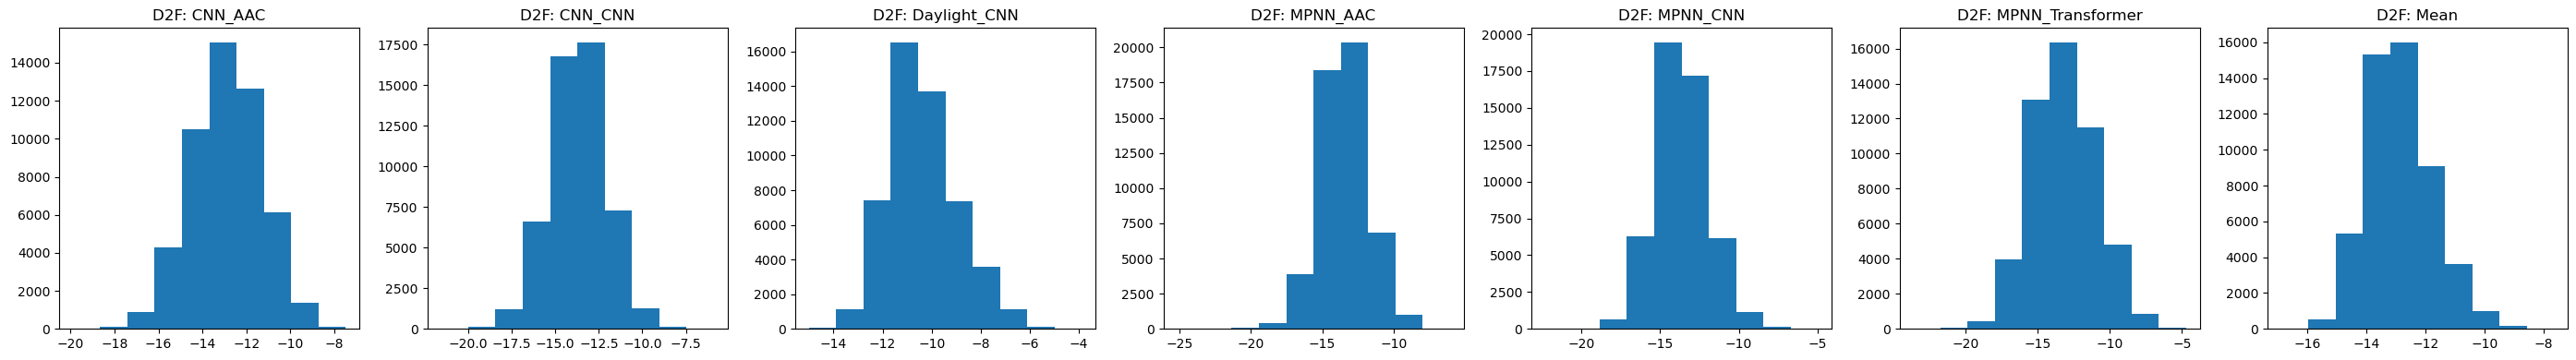

In [17]:
fig,ax = plt.subplots(1,pred_mean.shape[1]-1, figsize=(4*(pred_mean.shape[1]-1),4))

[pred_mean[x].hist(ax=ax[i], grid=False).set_title('D2F: '+x) for i,x in enumerate(pred_mean.columns[1:])]
fig.tight_layout()

fig.savefig(OUTPUT_FILE3)

In [18]:
!TZ=US/Eastern date

Sun Apr 13 11:48:54 EDT 2025
